### Apply Spark

In [308]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import datetime
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

# OUR KEYS
api_key = 'sYtiVctHq282BahmHSes3po34SpmlNOqLExqODQSYPzWObTfHsvNyC579MrO6h3q'
api_secret = 'uofmKbSwjtSOQSWj6Bku7DvZ6dyW655aolkg795a5oS2NpPJ50F2X3x4MyFG6XLZ'
client = Client(api_key, api_secret)

In [309]:
#TWO FUNCTIONS TO MANAGE THE DATE
def unix_to_datetime(unix_time):
    return datetime.datetime.fromtimestamp(unix_time/1000.0)

def date_to_unix(date):
    date = datetime.datetime.now()
    date = date.replace(hour=0, minute=0, second=0, microsecond=0)
    date = date - datetime.timedelta(days=15)
    return int(date.timestamp()*1000)

# THE CRYPTO WE ARE GOING TO TRACK
crypto = 'ETHUSDT'
results = []

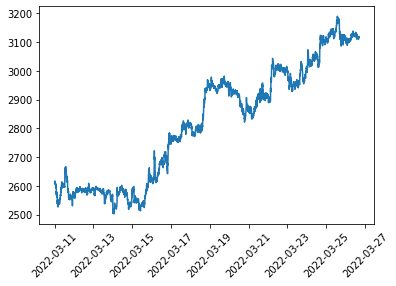

In [311]:
# RETRIEVE THE DATA FROM THE API
klines = client.get_historical_klines(crypto, Client.KLINE_INTERVAL_5MINUTE, date_to_unix(datetime.datetime.now()))
values = [[unix_to_datetime(el[0]),float(el[1])] for el in klines]

df = pd.DataFrame(values, columns=['ds', 'y'])
plt.plot(df['ds'], df['y'])
plt.xticks(rotation=45)
plt.show()  

In [312]:
df_test = df.iloc[:,1]

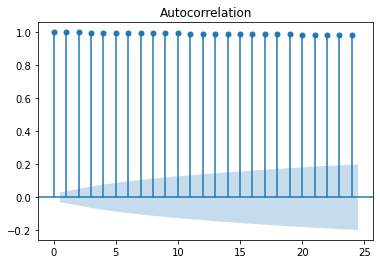

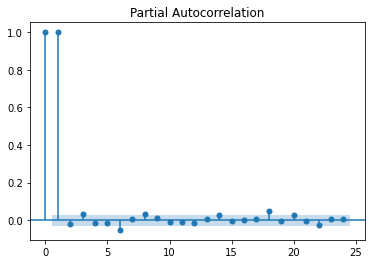

In [313]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

nlags = 24 # play with this parameter

plot_acf(df_test, lags = nlags)
plt.show()

plot_pacf(df_test, lags = nlags,method="ols")
plt.show()

In [314]:
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(df_test,maxlag=10) 
print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("Estadistico:" , adf_test[0])
print("p-value:" , adf_test[1])

adf_test (-0.5532119423041081, 0.8812076839054156, 7, 4511, {'1%': -3.431800459993271, '5%': -2.862180931182044, '10%': -2.5671111710707306}, 27487.655518339347)
Estadistico: -0.5532119423041081
p-value: 0.8812076839054156


In [315]:
len(klines)

4519

In [316]:
df = pd.DataFrame(klines, columns = ['Open Time', 'Open', 'High','Low', 'Close', 'Volume', 'Close Time', 'QAV', 'No. Trades', 'Taker BBAV', 'Taker BQAV', 'Close Candlestick'])
df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,QAV,No. Trades,Taker BBAV,Taker BQAV,Close Candlestick
0,1646953200000,2612.40000000,2617.94000000,2610.29000000,2617.08000000,774.55360000,1646953499999,2024767.11897400,1461,532.36720000,1391640.07392100,0
1,1646953500000,2617.08000000,2617.93000000,2613.00000000,2616.56000000,770.75790000,1646953799999,2016091.07821800,1219,352.50530000,922087.91047000,0
2,1646953800000,2616.45000000,2618.51000000,2613.25000000,2615.01000000,1449.96000000,1646954099999,3792631.40594200,1501,816.43270000,2135383.73660000,0
3,1646954100000,2615.00000000,2615.89000000,2613.32000000,2615.23000000,607.93170000,1646954399999,1589984.18161900,876,337.34380000,882319.27260100,0
4,1646954400000,2615.22000000,2615.54000000,2603.69000000,2610.38000000,1377.54940000,1646954699999,3594262.82779500,1764,692.16730000,1805623.09875500,0


In [318]:
df['Open Time'] = pd.to_datetime(df['Open Time'], unit='ms')
df['Close Time'] = pd.to_datetime(df['Close Time'], unit='ms')
df.head(5)

,Open Time,Open,High,Low,Close,Volume,Close Time,QAV,No. Trades,Taker BBAV,Taker BQAV,Close Candlestick
0,2022-03-10 23:00:00,2612.40000000,2617.94000000,2610.29000000,2617.08000000,774.55360000,2022-03-10 23:04:59.999,2024767.11897400,1461,532.36720000,1391640.07392100,0
1,2022-03-10 23:05:00,2617.08000000,2617.93000000,2613.00000000,2616.56000000,770.75790000,2022-03-10 23:09:59.999,2016091.07821800,1219,352.50530000,922087.91047000,0
2,2022-03-10 23:10:00,2616.45000000,2618.51000000,2613.25000000,2615.01000000,1449.96000000,2022-03-10 23:14:59.999,3792631.40594200,1501,816.43270000,2135383.73660000,0
3,2022-03-10 23:15:00,2615.00000000,2615.89000000,2613.32000000,2615.23000000,607.93170000,2022-03-10 23:19:59.999,1589984.18161900,876,337.34380000,882319.27260100,0
4,2022-03-10 23:20:00,2615.22000000,2615.54000000,2603.69000000,2610.38000000,1377.54940000,2022-03-10 23:24:59.999,3594262.82779500,1764,692.16730000,1805623.09875500,0


In [319]:
df.dtypes

Open Time            datetime64[ns]
Open                         object
High                         object
Low                          object
Close                        object
Volume                       object
Close Time           datetime64[ns]
QAV                          object
No. Trades                    int64
Taker BBAV                   object
Taker BQAV                   object
Close Candlestick            object
dtype: object

# START

In [1]:
import findspark
findspark.init()
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [3]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages "graphframes:graphframes:0.8.2-spark3.2-s_2.12" --jars /opt/hive3/lib/hive-hcatalog-core-3.1.2.jar pyspark-shell'

In [4]:
from pyspark.sql.session import SparkSession

spark = (SparkSession.builder
    .appName('Binance_ingestion')
    .config('spark.sql.warehouse.dir','hdfs://localhost:50070/binance/binance_crypto/binance_crypto_final.csv')
    .enableHiveSupport()
    .getOrCreate())

Ivy Default Cache set to: /home/osbdet/.ivy2/cache
The jars for the packages stored in: /home/osbdet/.ivy2/jars
:: loading settings :: url = jar:file:/opt/spark3/jars/ivy-2.4.0.jar!/org/apache/ivy/core/settings/ivysettings.xml
graphframes#graphframes added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-34626426-fea9-44e3-824f-6cb747826143;1.0
	confs: [default]
	found graphframes#graphframes;0.8.2-spark3.2-s_2.12 in spark-packages
	found org.slf4j#slf4j-api;1.7.16 in central
:: resolution report :: resolve 157ms :: artifacts dl 9ms
	:: modules in use:
	graphframes#graphframes;0.8.2-spark3.2-s_2.12 from spark-packages in [default]
	org.slf4j#slf4j-api;1.7.16 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	------------------------------------------------------------

In [5]:
df_spark = (spark.read.option("header","true")
                 .option("inferSchema","true")
                 .csv("binance_crypto_final.csv")
                 .cache())

print(f"There are {df_spark.count()} rows in the datasets")

There are 4481 rows in the datasets


In [6]:
df_spark.printSchema()

root
 |-- Open Time: string (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: double (nullable = true)
 |-- Close Time: string (nullable = true)
 |-- QAV: double (nullable = true)
 |-- No. Trades: integer (nullable = true)
 |-- Taker BBAV: double (nullable = true)
 |-- Taker BQAV: double (nullable = true)
 |-- Close Candlestick: integer (nullable = true)



In [7]:
df_spark.limit(5).toPandas()

,Open Time,Open,High,Low,Close,Volume,Close Time,QAV,No. Trades,Taker BBAV,Taker BQAV,Close Candlestick
0,2022-03-09 23:00:00,2716.67,2720.97,2709.34,2711.72,719.5814,2022-03-09 23:04:59.999,1.953036e+06,2008,379.4372,1.029742e+06,0
1,2022-03-09 23:05:00,2711.72,2716.46,2711.71,2714.99,332.7430,2022-03-09 23:09:59.999,9.030670e+05,1196,160.8142,4.364028e+05,0
2,2022-03-09 23:10:00,2715.00,2718.71,2714.99,2716.40,473.4686,2022-03-09 23:14:59.999,1.286253e+06,1026,305.7628,8.306604e+05,0
3,2022-03-09 23:15:00,2716.40,2719.47,2714.51,2716.87,1142.8323,2022-03-09 23:19:59.999,3.105304e+06,1325,677.0261,1.839621e+06,0
4,2022-03-09 23:20:00,2716.88,2716.88,2710.43,2711.45,568.8690,2022-03-09 23:24:59.999,1.543525e+06,920,300.3212,8.147264e+05,0


# Data cleaning and feature selection

In [8]:
from pyspark.sql.functions import percent_rank
from pyspark.sql import Window

In [9]:
df_spark = df_spark.withColumn("rank", percent_rank().over(Window.partitionBy().orderBy(df_spark[0])))
df_spark.limit(5).toPandas()

,Open Time,Open,High,Low,Close,Volume,Close Time,QAV,No. Trades,Taker BBAV,Taker BQAV,Close Candlestick,rank
0,2022-03-09 23:00:00,2716.67,2720.97,2709.34,2711.72,719.5814,2022-03-09 23:04:59.999,1.953036e+06,2008,379.4372,1.029742e+06,0,0.000000
1,2022-03-09 23:05:00,2711.72,2716.46,2711.71,2714.99,332.7430,2022-03-09 23:09:59.999,9.030670e+05,1196,160.8142,4.364028e+05,0,0.000223
2,2022-03-09 23:10:00,2715.00,2718.71,2714.99,2716.40,473.4686,2022-03-09 23:14:59.999,1.286253e+06,1026,305.7628,8.306604e+05,0,0.000446
3,2022-03-09 23:15:00,2716.40,2719.47,2714.51,2716.87,1142.8323,2022-03-09 23:19:59.999,3.105304e+06,1325,677.0261,1.839621e+06,0,0.000670
4,2022-03-09 23:20:00,2716.88,2716.88,2710.43,2711.45,568.8690,2022-03-09 23:24:59.999,1.543525e+06,920,300.3212,8.147264e+05,0,0.000893


In [10]:
stats_df = df_spark.describe()
stats_df.limit(5).toPandas()

,summary,Open Time,Open,High,Low,Close,Volume,Close Time,QAV,No. Trades,Taker BBAV,Taker BQAV,Close Candlestick,rank
0,count,4481,4481,4481,4481,4481,4481,4481,4481,4481,4481,4481,4481,4481
1,mean,None,2783.0510131667015,2786.666911403711,2779.4696652532793,2783.1524213345187,1566.1890301272022,None,4379111.178805381,2410.908056237447,796.3763109350598,2229631.4540197933,0.0,0.4999999999999998
2,stddev,None,188.4290979767438,188.51079364041433,188.37038221512427,188.51540895137694,1866.831986702214,None,5224756.579079071,2602.4621563101755,1024.7491734878427,2896088.359420502,0.0,0.28877178741849274
3,min,2022-03-09 23:00:00,2502.49,2508.15,2493.0,2502.49,72.8432,2022-03-09 23:04:59.999,188409.914803,391,22.3703,57906.463663,0,0.0
4,max,2022-03-25 12:20:00,3174.95,3179.37,3172.14,3174.95,31758.325,2022-03-25 12:24:59.999,8.5289659706022E7,50594,19111.4398,5.7316356364154E7,0,1.0


In [11]:
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor

In [12]:
df_spark = df_spark.select('Open Time', "rank",'Close', 'Open', 'High', 'Low')

In [13]:
from pyspark.sql.functions import lag, col
from pyspark.sql.window import Window
from pyspark.sql import functions as F

conditional_window = Window.partitionBy().orderBy("rank")

columns = ['Close', 'Open', 'High', 'Low']
for column in columns:
    df_spark = df_spark.withColumn(f'{column}_lag', F.lag(df_spark[column],1).over(conditional_window))

df_spark.limit(5).toPandas().head()


,Open Time,rank,Close,Open,High,Low,Close_lag,Open_lag,High_lag,Low_lag
0,2022-03-09 23:00:00,0.000000,2711.72,2716.67,2720.97,2709.34,NaN,NaN,NaN,NaN
1,2022-03-09 23:05:00,0.000223,2714.99,2711.72,2716.46,2711.71,2711.72,2716.67,2720.97,2709.34
2,2022-03-09 23:10:00,0.000446,2716.40,2715.00,2718.71,2714.99,2714.99,2711.72,2716.46,2711.71
3,2022-03-09 23:15:00,0.000670,2716.87,2716.40,2719.47,2714.51,2716.40,2715.00,2718.71,2714.99
4,2022-03-09 23:20:00,0.000893,2711.45,2716.88,2716.88,2710.43,2716.87,2716.40,2719.47,2714.51


In [14]:
df_spark = df_spark.dropna().select(['rank', 'Open Time', 'Close', 'Close_lag', 'Open_lag', 'High_lag', 'Low_lag'])
df_spark.limit(5).toPandas().head()

,rank,Open Time,Close,Close_lag,Open_lag,High_lag,Low_lag
0,0.000223,2022-03-09 23:05:00,2714.99,2711.72,2716.67,2720.97,2709.34
1,0.000446,2022-03-09 23:10:00,2716.40,2714.99,2711.72,2716.46,2711.71
2,0.000670,2022-03-09 23:15:00,2716.87,2716.40,2715.00,2718.71,2714.99
3,0.000893,2022-03-09 23:20:00,2711.45,2716.87,2716.40,2719.47,2714.51
4,0.001116,2022-03-09 23:25:00,2718.14,2711.45,2716.88,2716.88,2710.43


In [15]:
df_spark = df_spark.withColumn('open_close_dispersion_lag', df_spark['High_lag'] - df_spark['Low_lag'])

In [16]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols=['Close_lag', 'Open_lag', 'High_lag', 'Low_lag', 'open_close_dispersion_lag'],outputCol='features')

In [17]:
from pyspark.sql.functions import mean, sqrt, pow, log, concat, abs, when

In [18]:
stock_vol_df_train = df_spark.where("rank <= .6")
stock_vol_df_train.limit(5).toPandas()

,rank,Open Time,Close,Close_lag,Open_lag,High_lag,Low_lag,open_close_dispersion_lag
0,0.000223,2022-03-09 23:05:00,2714.99,2711.72,2716.67,2720.97,2709.34,11.63
1,0.000446,2022-03-09 23:10:00,2716.40,2714.99,2711.72,2716.46,2711.71,4.75
2,0.000670,2022-03-09 23:15:00,2716.87,2716.40,2715.00,2718.71,2714.99,3.72
3,0.000893,2022-03-09 23:20:00,2711.45,2716.87,2716.40,2719.47,2714.51,4.96
4,0.001116,2022-03-09 23:25:00,2718.14,2711.45,2716.88,2716.88,2710.43,6.45


In [19]:
stock_vol_df_validation = df_spark.filter(df_spark.rank.between(0.6, 0.8))
stock_vol_df_validation.limit(5).toPandas()

,rank,Open Time,Close,Close_lag,Open_lag,High_lag,Low_lag,open_close_dispersion_lag
0,0.600000,2022-03-19 07:00:00,2933.00,2937.39,2936.21,2937.57,2936.21,1.36
1,0.600223,2022-03-19 07:05:00,2932.18,2933.00,2937.40,2937.40,2932.99,4.41
2,0.600446,2022-03-19 07:10:00,2932.11,2932.18,2932.99,2934.92,2930.72,4.20
3,0.600670,2022-03-19 07:15:00,2925.36,2932.11,2932.18,2934.21,2930.52,3.69
4,0.600893,2022-03-19 07:20:00,2928.75,2925.36,2932.12,2932.72,2922.16,10.56


In [20]:
stock_vol_df_final_train = df_spark.where("rank < .8")
stock_vol_df_final_train.limit(5).toPandas().head()

,rank,Open Time,Close,Close_lag,Open_lag,High_lag,Low_lag,open_close_dispersion_lag
0,0.000223,2022-03-09 23:05:00,2714.99,2711.72,2716.67,2720.97,2709.34,11.63
1,0.000446,2022-03-09 23:10:00,2716.40,2714.99,2711.72,2716.46,2711.71,4.75
2,0.000670,2022-03-09 23:15:00,2716.87,2716.40,2715.00,2718.71,2714.99,3.72
3,0.000893,2022-03-09 23:20:00,2711.45,2716.87,2716.40,2719.47,2714.51,4.96
4,0.001116,2022-03-09 23:25:00,2718.14,2711.45,2716.88,2716.88,2710.43,6.45


In [21]:
stock_vol_df_test = df_spark.where("rank > .8")
stock_vol_df_test.limit(5).toPandas()

,rank,Open Time,Close,Close_lag,Open_lag,High_lag,Low_lag,open_close_dispersion_lag
0,0.800223,2022-03-22 09:45:00,3008.19,3009.19,3005.57,3010.23,3004.36,5.87
1,0.800446,2022-03-22 09:50:00,3009.00,3008.19,3009.20,3010.59,3006.39,4.20
2,0.800670,2022-03-22 09:55:00,3006.02,3009.00,3008.19,3009.81,3007.19,2.62
3,0.800893,2022-03-22 10:00:00,3003.58,3006.02,3009.00,3010.92,3003.52,7.40
4,0.801116,2022-03-22 10:05:00,3003.53,3003.58,3006.03,3006.31,3001.01,5.30


# Model

In [22]:
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, RandomForestRegressor

In [23]:
lr = LinearRegression(featuresCol='features', labelCol = 'Close',maxIter=10,regParam=0.3,elasticNetParam=0.8)

In [24]:
rf = RandomForestRegressor(featuresCol='features', labelCol = 'Close', numTrees=2, maxDepth=2)

In [25]:
from pyspark.ml import Pipeline
test_pipeline = Pipeline(stages = [vectorAssembler, lr])

# Train

In [26]:
predicted_train = test_pipeline.fit(stock_vol_df_train).transform(stock_vol_df_train)

In [27]:
r2_train = predicted_train.withColumn('MAPE', (abs(predicted_train['Close'] - predicted_train['prediction']) / predicted_train['Close']))
r2_train.select(mean('MAPE')*100).show()

+------------------+
| (avg(MAPE) * 100)|
+------------------+
|0.1475152146629856|
+------------------+



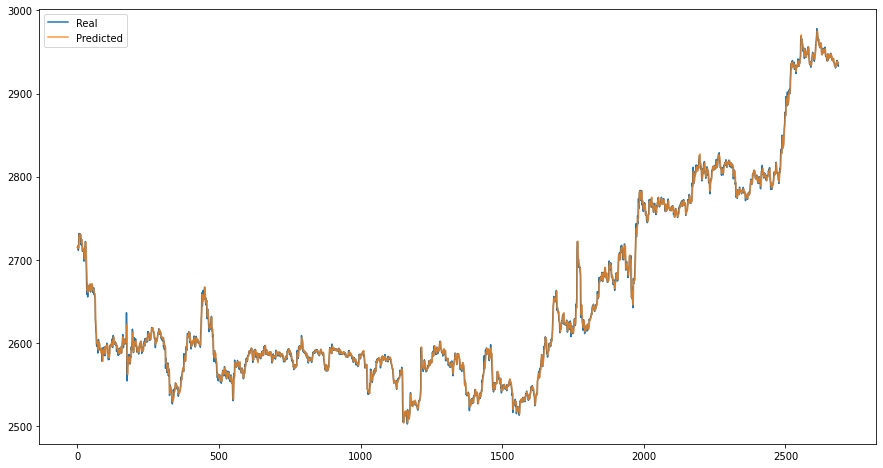

In [28]:
plt.figure(figsize=(15,8))
plt.plot(stock_vol_df_train.toPandas()['Close'], label='Real')
plt.plot(predicted_train.toPandas()['prediction'], label='Predicted', alpha=0.8)
plt.legend()

### Computing the results to build the investement vector.

In [29]:
predicted_train = predicted_train.withColumn('pred_returns_train', (predicted_train['prediction'] / F.lag(predicted_train["prediction"],1).over(conditional_window) - 1)).dropna()
predicted_train = predicted_train.withColumn('train_vector', when(col('pred_returns_train') > 0, 1).otherwise(-1))
predicted_train = predicted_train.withColumn('real_returns_train', (predicted_train['Close'] / F.lag(predicted_train["Close"],1).over(conditional_window) - 1)).dropna()
predicted_train = predicted_train.withColumn('inversion_results_train', predicted_train['train_vector'] * predicted_train['real_returns_train'])

### Return of investment

In [30]:
money_flow_train = predicted_train.select('inversion_results_train').collect()
portfolio = 1000
initial = portfolio
results_over_time_train = []
for money in money_flow_train:
    portfolio = portfolio * (1+(money['inversion_results_train']))
    results_over_time_train.append(portfolio)
F'Final return {round((portfolio/initial - 1) *100, 2)} % with final portfolio value of {round(portfolio, 2)}'

'Final return 1.5 % with final portfolio value of 1014.99'

Text(0.5, 1.0, 'Portfolio value over time')

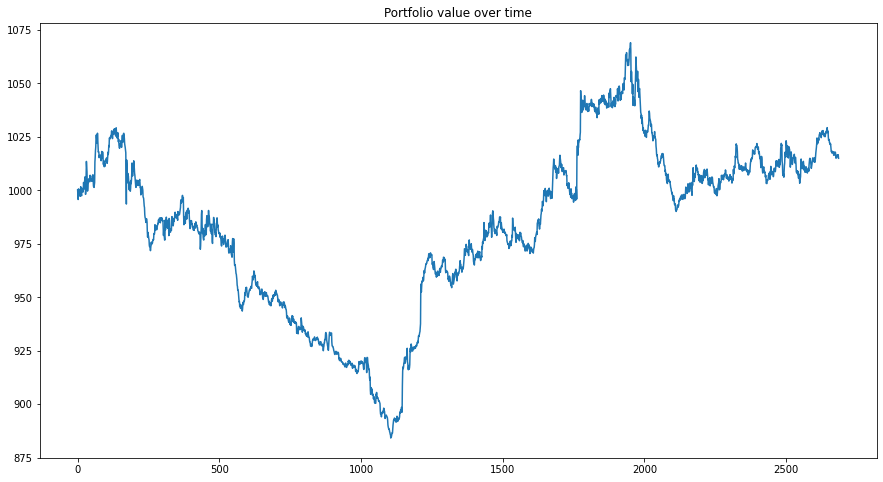

In [31]:
plt.figure(figsize=(15,8))
plt.plot(pd.Series(results_over_time_train))
plt.title('Portfolio value over time')

In [32]:
print('Buy signals:', predicted_train.select('train_vector').where(predicted_train.train_vector==1).count())     
print('Sell signals:', predicted_train.select('train_vector').where(predicted_train.train_vector==-1).count())

Buy signals: 1362
Sell signals: 1324


# Validation

In [33]:
predicted_val = test_pipeline.fit(stock_vol_df_train).transform(stock_vol_df_validation)

In [34]:
r2_val = predicted_val.withColumn('MAPE', (abs(predicted_val['Close'] - predicted_val['prediction']) / predicted_val['Close']))
r2_val.select(mean('MAPE')*100).show()

+-------------------+
|  (avg(MAPE) * 100)|
+-------------------+
|0.14216330056939352|
+-------------------+



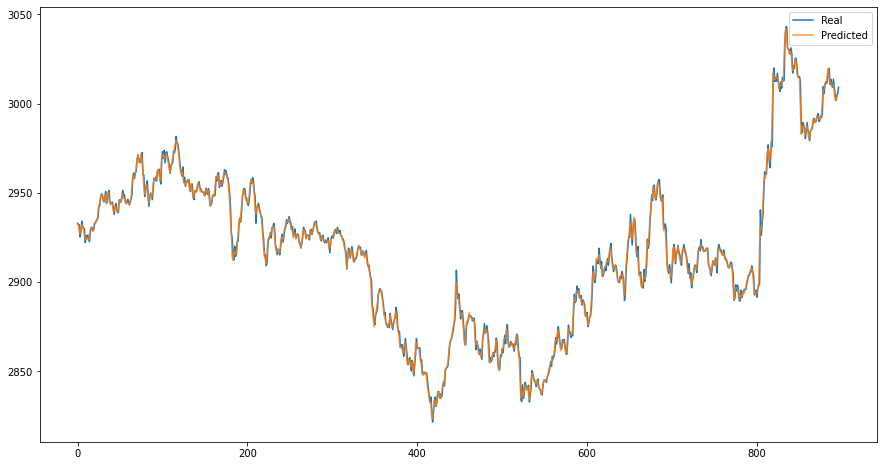

In [49]:
plt.figure(figsize=(15,8))
plt.plot(stock_vol_df_validation.toPandas()['Close'],  label='Real')
plt.plot(predicted_val.toPandas()['prediction'],  label='Predicted', alpha=0.8)
plt.legend()

### Computing the results to build the investement vector.

In [36]:
predicted_val = predicted_val.withColumn('pred_returns_val', (predicted_val['prediction'] / F.lag(predicted_val["prediction"],1).over(conditional_window) - 1)).dropna()
predicted_val = predicted_val.withColumn('val_vector', when(col('pred_returns_val') > 0, 1).otherwise(-1))
predicted_val = predicted_val.withColumn('real_returns_train', (predicted_val['Close'] / F.lag(predicted_val["Close"],1).over(conditional_window) - 1)).dropna()
predicted_val = predicted_val.withColumn('inversion_results_val', predicted_val['val_vector'] * predicted_val['real_returns_train'])

### Return of investment

In [37]:
money_flow_val = predicted_val.select('inversion_results_val').collect()
portfolio = 1000
initial = portfolio
results_over_time_val = []
for money in money_flow_val:
    portfolio = portfolio * (1+(money['inversion_results_val']))
    results_over_time_val.append(portfolio)
F'Final return {round((portfolio/initial - 1) *100, 2)} % with final portfolio value of {round(portfolio, 2)}'

'Final return 1.07 % with final portfolio value of 1010.71'

Text(0.5, 1.0, 'Portfolio value over time')

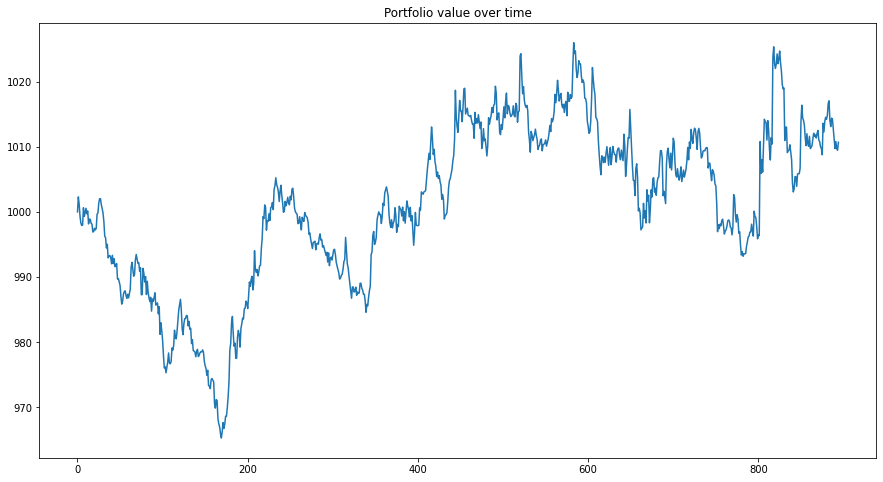

In [38]:
plt.figure(figsize=(15,8))
plt.plot(pd.Series(results_over_time_val))
plt.title('Portfolio value over time')

In [39]:
print('Buy signals:', predicted_val.select('val_vector').where(predicted_val.val_vector==1).count())     
print('Sell signals:', predicted_val.select('val_vector').where(predicted_val.val_vector==-1).count())

Buy signals: 455
Sell signals: 440


# Test

In [40]:
predicted_test = test_pipeline.fit(stock_vol_df_final_train).transform(stock_vol_df_test)

In [41]:
r2_test = predicted_test.withColumn('MAPE', (abs(predicted_test['Close'] - predicted_test['prediction']) / predicted_test['Close']))
r2_test.select(mean('MAPE')*100).show()

+------------------+
| (avg(MAPE) * 100)|
+------------------+
|0.1387683061798938|
+------------------+



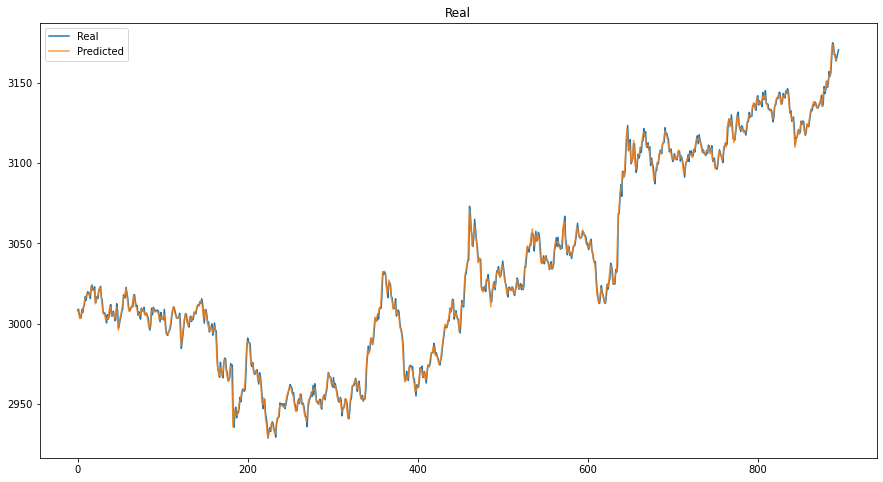

In [48]:
plt.figure(figsize=(15,8))
plt.plot(stock_vol_df_test.toPandas()['Close'], label='Real')
plt.plot(predicted_test.toPandas()['prediction'], label='Predicted', alpha=0.8)
plt.title('Real')
plt.legend()

### Computing the results to build the investement vector.

In [43]:
predicted_test = predicted_test.withColumn('pred_returns_test', (predicted_test['prediction'] / F.lag(predicted_test["prediction"],1).over(conditional_window) - 1)).dropna()
predicted_test = predicted_test.withColumn('test_vector', when(col('pred_returns_test') > 0, 1).otherwise(-1))
predicted_test = predicted_test.withColumn('real_returns_train', (predicted_test['Close'] / F.lag(predicted_test["Close"],1).over(conditional_window) - 1)).dropna()
predicted_test = predicted_test.withColumn('inversion_results_test', predicted_test['test_vector'] * predicted_test['real_returns_train'])

### Return of investment

In [44]:
money_flow_test = predicted_test.select('inversion_results_test').collect()
portfolio = 1000
initial = portfolio
results_over_time_test = []
for money in money_flow_test:
    portfolio = portfolio * (1+(money['inversion_results_test']))
    results_over_time_test.append(portfolio)
F'Final return {round((portfolio/initial - 1) *100, 2)} % with final portfolio value of {round(portfolio, 2)}'

'Final return 3.5 % with final portfolio value of 1035.03'

Text(0.5, 1.0, 'Portfolio value over time')

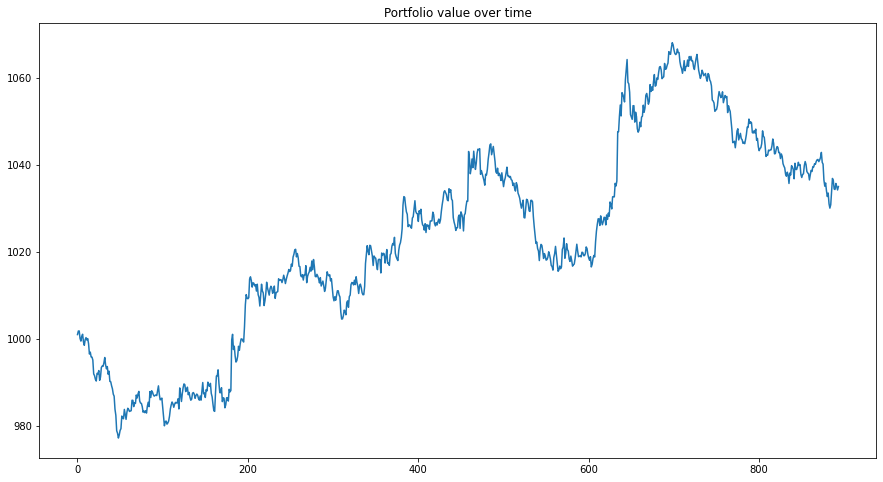

In [45]:
plt.figure(figsize=(15,8))
plt.plot(pd.Series(results_over_time_test))
plt.title('Portfolio value over time')

In [46]:
print('Buy signals:', predicted_test.select('test_vector').where(predicted_test.test_vector==1).count())     
print('Sell signals:', predicted_test.select('test_vector').where(predicted_test.test_vector==-1).count())

Buy signals: 478
Sell signals: 416
